## 1. Preliminaries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib; matplotlib.style.use('ggplot')

from pandas import set_option
set_option('display.max_rows',16)

LARGE_FIGSIZE = (12,8)

from ipywidgets import interact

In [3]:
# inline plots
%matplotlib inline

## 2. Read and verify data

In [4]:
# read csv dataset and load into pandas dataframe object "le"
le = pd.read_csv('life.csv')

In [6]:
# check the first few lines
le.head()

,Country,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,67.699000,68.034683,...,74.090854,74.228073,74.376195,74.526756,74.675732,74.818146,74.953537,75.081390,75.205756,75.328659
1,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,32.328512,32.777439,33.219902,33.657878,34.092878,34.525390,34.957415,35.389415,...,56.626317,57.027244,57.432561,57.833829,58.225024,58.603683,58.970829,59.327951,59.679610,60.028268
3,Angola,AGO,32.984829,33.386220,33.787585,34.188463,34.590341,34.992220,35.395098,35.799976,...,48.003512,48.538805,49.007049,49.435732,49.847390,50.251024,50.654171,51.059317,51.464000,51.866171
4,Albania,ALB,62.254366,63.273463,64.162854,64.887098,65.438195,65.827390,66.089317,66.287220,...,75.839000,76.089390,76.290537,76.464854,76.632317,76.801878,76.978512,77.163220,77.350463,77.537244


In [7]:
# verify dataframe shape
le.shape

(248, 56)

In [8]:
# review dataframe info
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 56 columns):
Country    248 non-null object
Code       248 non-null object
1960       222 non-null float64
1961       223 non-null float64
1962       223 non-null float64
1963       222 non-null float64
1964       222 non-null float64
1965       223 non-null float64
1966       223 non-null float64
1967       223 non-null float64
1968       223 non-null float64
1969       223 non-null float64
1970       224 non-null float64
1971       223 non-null float64
1972       223 non-null float64
1973       224 non-null float64
1974       223 non-null float64
1975       223 non-null float64
1976       223 non-null float64
1977       223 non-null float64
1978       225 non-null float64
1979       224 non-null float64
1980       225 non-null float64
1981       225 non-null float64
1982       229 non-null float64
1983       226 non-null float64
1984       226 non-null float64
1985       226 non-null float64
1

In [9]:
# set dataframe row index to country
le = le.set_index('Country')

In [10]:
le.head()

,Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,67.699000,68.034683,68.377146,...,74.090854,74.228073,74.376195,74.526756,74.675732,74.818146,74.953537,75.081390,75.205756,75.328659
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,32.328512,32.777439,33.219902,33.657878,34.092878,34.525390,34.957415,35.389415,35.822415,...,56.626317,57.027244,57.432561,57.833829,58.225024,58.603683,58.970829,59.327951,59.679610,60.028268
Angola,AGO,32.984829,33.386220,33.787585,34.188463,34.590341,34.992220,35.395098,35.799976,36.205854,...,48.003512,48.538805,49.007049,49.435732,49.847390,50.251024,50.654171,51.059317,51.464000,51.866171
Albania,ALB,62.254366,63.273463,64.162854,64.887098,65.438195,65.827390,66.089317,66.287220,66.474951,...,75.839000,76.089390,76.290537,76.464854,76.632317,76.801878,76.978512,77.163220,77.350463,77.537244


## 3. Initial EDA

### Q. Did life expectancy increase from 1960 to 2013?

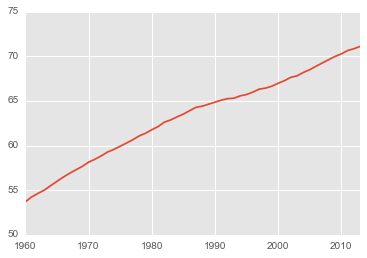

In [11]:
le.mean().plot()

### Q. Which countries had the highest and lowest life expectancy in 1960? (graph)

In [12]:
# idxmax and idxmin provide the indices corresponding to max and min values in a column
print le['1960'].idxmax()
print le['1960'].idxmin()

Norway
Mali


In [13]:
# max and min provide the values
print round(le['1960'].min())
print round(le['1960'].max())
print round(le['1960'].mean())

28.0
74.0
54.0


### Q. What were the highest, lowest and mean values in 1960?

In [14]:
#define function to display high, low mean for a given year.
def high_low_mean(year):
    print "In year, {}:".format(year)
    print "{} had the lowest life expectancy while".format(le[year].idxmin())
    print "{} had the highest life expectancy".format(le[year].idxmax())
    print "The mean life expectancy for {} is {}".format(year,round(le[year].mean()))

In [15]:
high_low_mean('1977')

In year, 1977:
Cambodia had the lowest life expectancy while
Iceland had the highest life expectancy
The mean life expectancy for 1977 is 61.0


### Q. Which countries had the highest and lowest gains in life expectancy?

In [16]:
#calculate gain and attach to new column
le['gain'] =(le['2013'] - le['1960'])/ le['1960']

In [17]:
# verify dataframe
le.head()

,Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,gain
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,67.699000,68.034683,68.377146,...,74.228073,74.376195,74.526756,74.675732,74.818146,74.953537,75.081390,75.205756,75.328659,0.148839
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,32.328512,32.777439,33.219902,33.657878,34.092878,34.525390,34.957415,35.389415,35.822415,...,57.027244,57.432561,57.833829,58.225024,58.603683,58.970829,59.327951,59.679610,60.028268,0.856821
Angola,AGO,32.984829,33.386220,33.787585,34.188463,34.590341,34.992220,35.395098,35.799976,36.205854,...,48.538805,49.007049,49.435732,49.847390,50.251024,50.654171,51.059317,51.464000,51.866171,0.572425
Albania,ALB,62.254366,63.273463,64.162854,64.887098,65.438195,65.827390,66.089317,66.287220,66.474951,...,76.089390,76.290537,76.464854,76.632317,76.801878,76.978512,77.163220,77.350463,77.537244,0.245491


In [18]:
# create pandas series object with only the gain column
gain = le['gain']

In [19]:
# verify object type of gain
type(gain)

pandas.core.series.Series

In [20]:
gain.head()

Country
Aruba          0.148839
Andorra             NaN
Afghanistan    0.856821
Angola         0.572425
Albania        0.245491
Name: gain, dtype: float64

In [21]:
# drop missing values and order the series
le_gain = gain.dropna().sort_values()

In [23]:
# ten countries with the most gain
le_gain.head(10)

Country
Ukraine               0.041874
Latvia                0.060092
Lesotho               0.060647
Lithuania             0.061793
Belarus               0.070341
Bulgaria              0.075357
Russian Federation    0.075965
Zimbabwe              0.079362
Slovak Republic       0.089817
Guyana                0.100057
Name: gain, dtype: float64

In [24]:
# ten countries with the least gain()
le_gain.tail(10)

Country
Tunisia        0.753077
Oman           0.800945
Yemen, Rep.    0.850305
Afghanistan    0.856821
Gambia, The    0.872507
Nepal          0.968165
Timor-Leste    1.002020
Mali           1.039416
Maldives       1.055418
Bhutan         1.135485
Name: gain, dtype: float64

In [25]:
# delete gain column from le dataframe
le.head()

,Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,gain
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,67.699000,68.034683,68.377146,...,74.228073,74.376195,74.526756,74.675732,74.818146,74.953537,75.081390,75.205756,75.328659,0.148839
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,32.328512,32.777439,33.219902,33.657878,34.092878,34.525390,34.957415,35.389415,35.822415,...,57.027244,57.432561,57.833829,58.225024,58.603683,58.970829,59.327951,59.679610,60.028268,0.856821
Angola,AGO,32.984829,33.386220,33.787585,34.188463,34.590341,34.992220,35.395098,35.799976,36.205854,...,48.538805,49.007049,49.435732,49.847390,50.251024,50.654171,51.059317,51.464000,51.866171,0.572425
Albania,ALB,62.254366,63.273463,64.162854,64.887098,65.438195,65.827390,66.089317,66.287220,66.474951,...,76.089390,76.290537,76.464854,76.632317,76.801878,76.978512,77.163220,77.350463,77.537244,0.245491


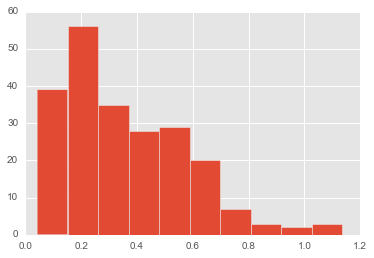

In [26]:
# histogram of gains
le_gain.hist()

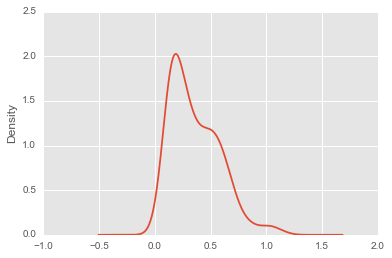

In [27]:
#kde plot of gains
le_gain.plot(kind='kde')

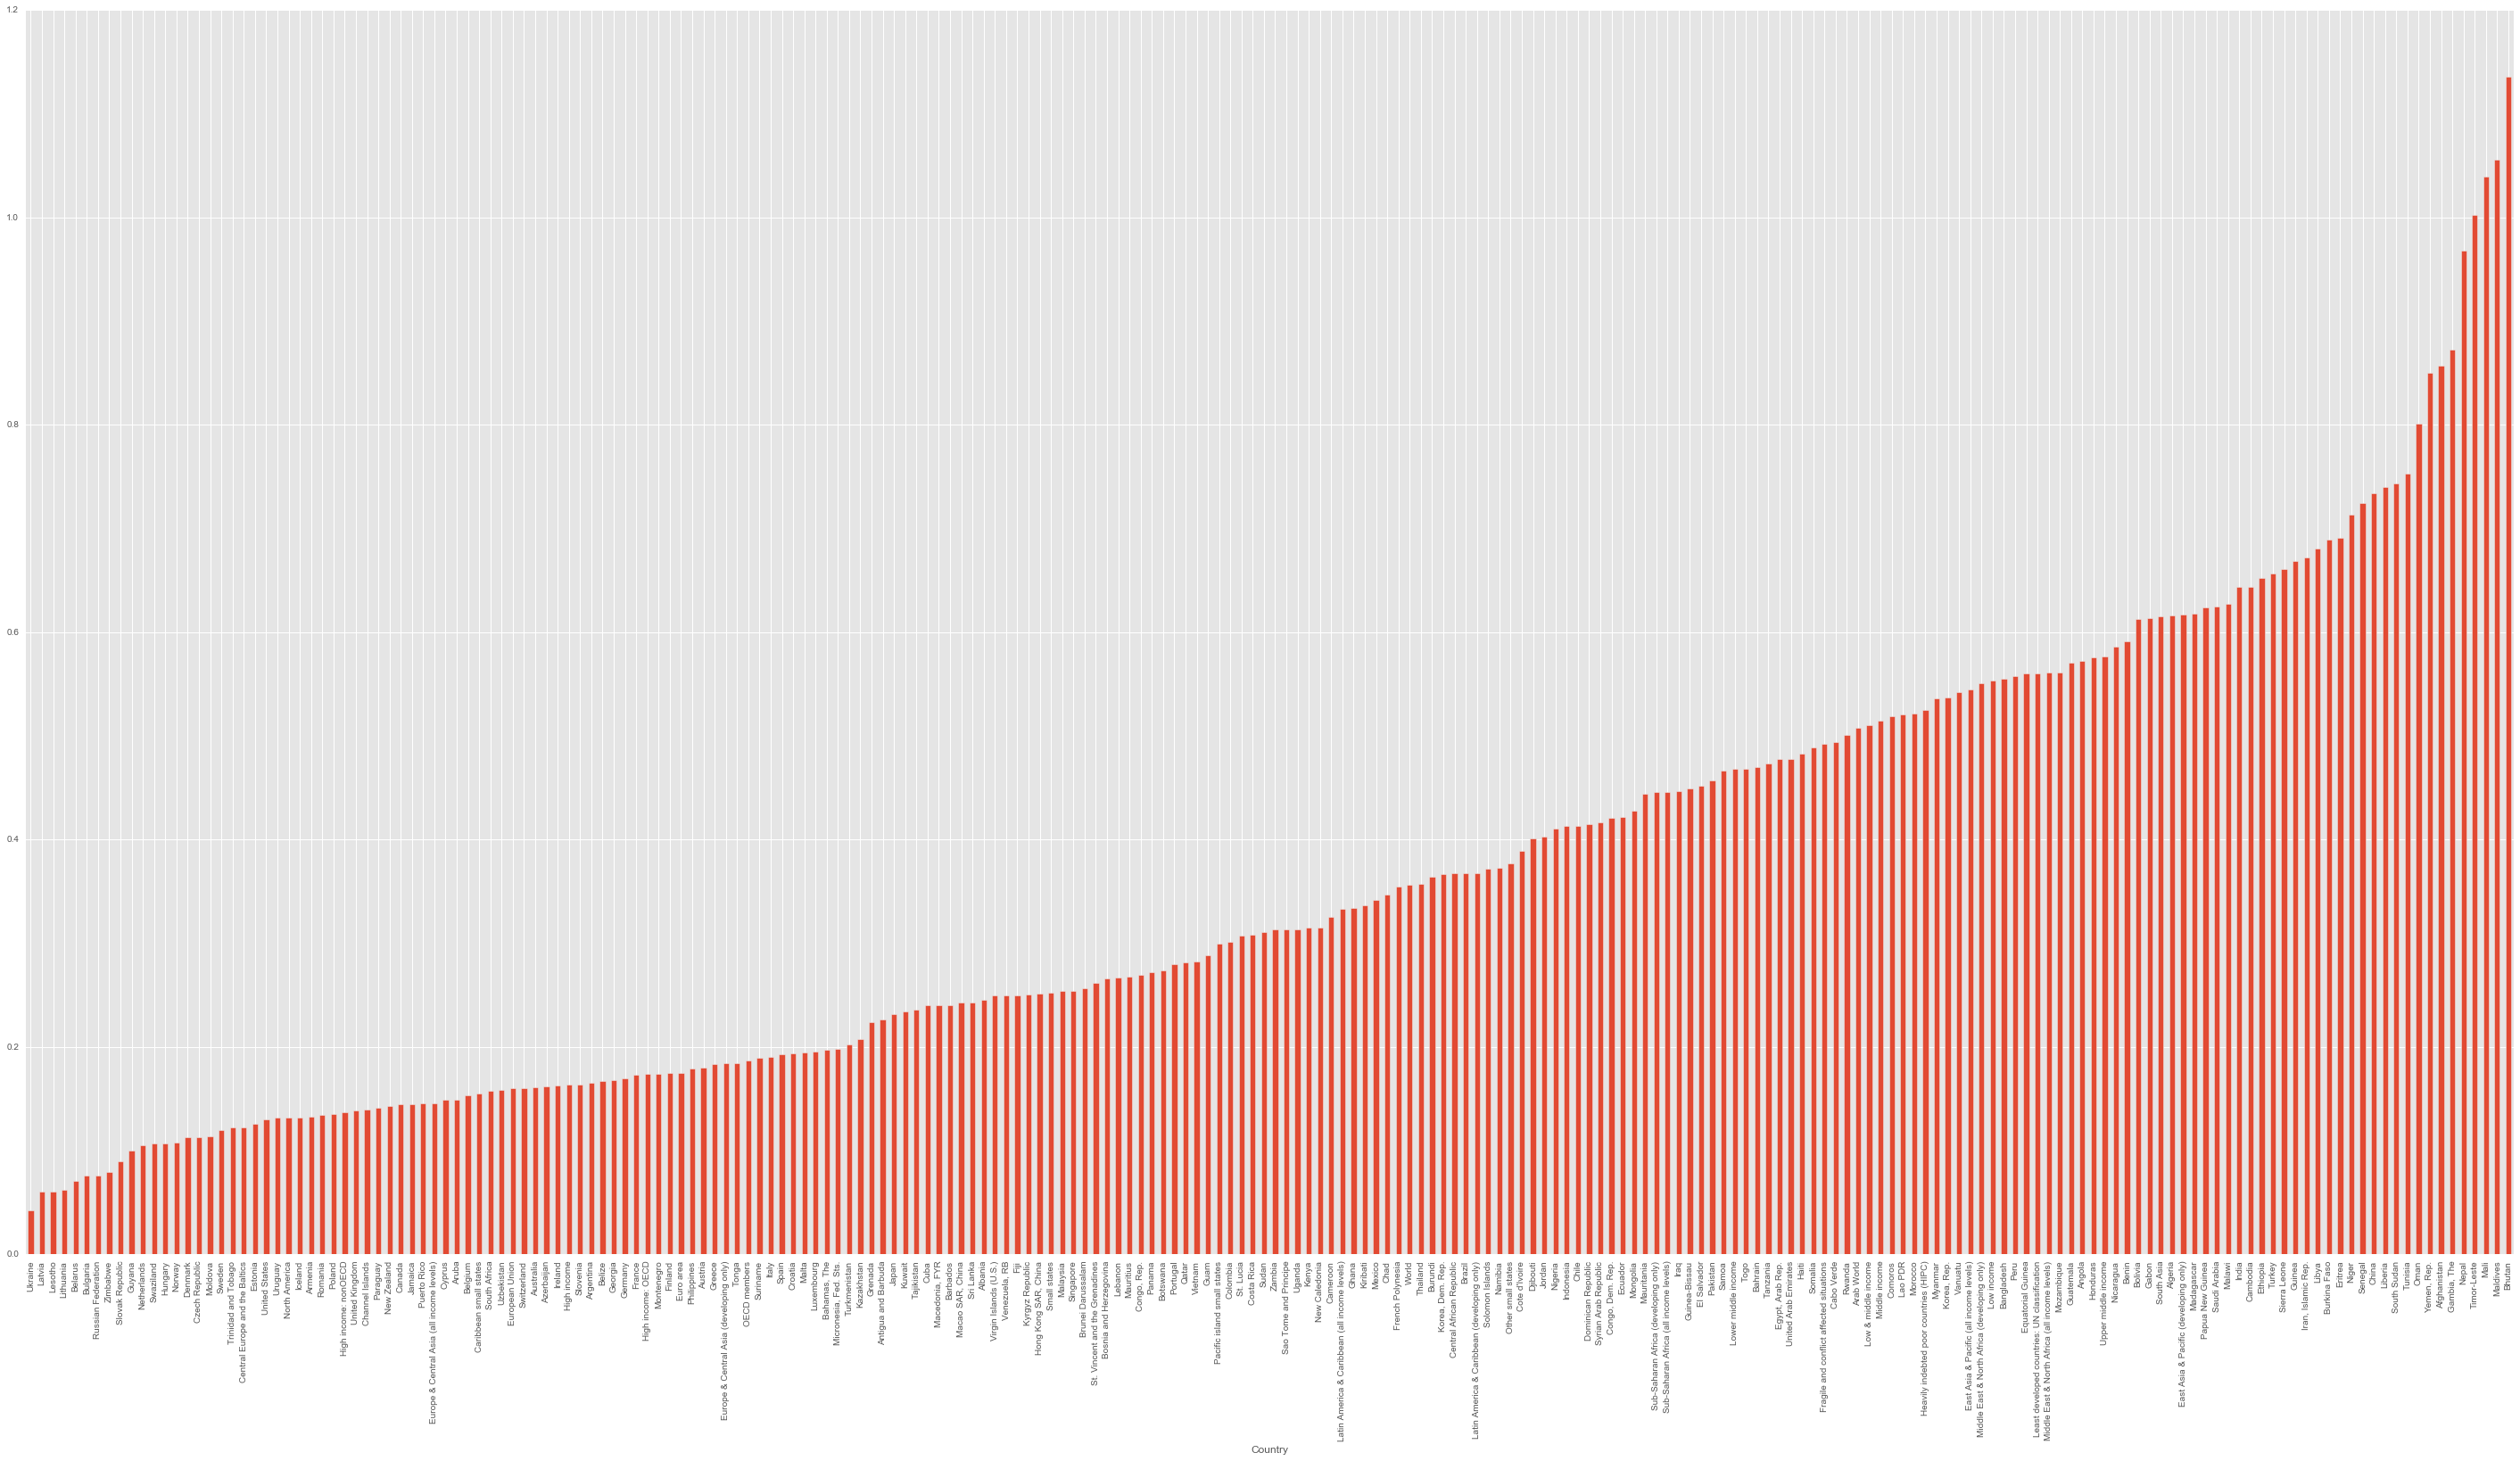

In [29]:
# bar graph of gains and save it to a file
ax = le_gain.plot(kind='bar',figsize=(50,25));
fig = ax.get_figure()
fig.savefig('gains.png')

## 4. Plots of various distributions
### Histograms

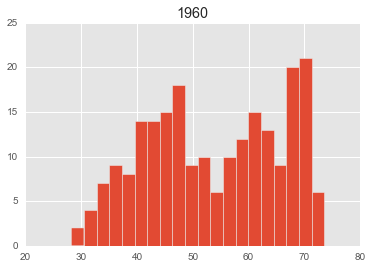

In [32]:
# Histogram of LE for a particular year using standard matplotlib and pandas
le.hist(column='1960', bins=20);

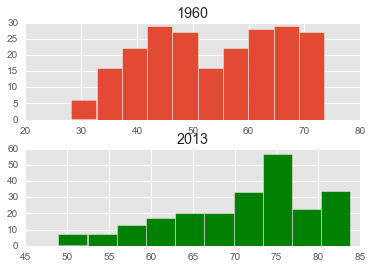

In [33]:
# compare distributions for years 1960 and 2013 in subplots
f, (ax1, ax2) = plt.subplots(2);
le.hist(column='1960',ax=ax1);
le.hist(column='2013',color='green',ax=ax2);

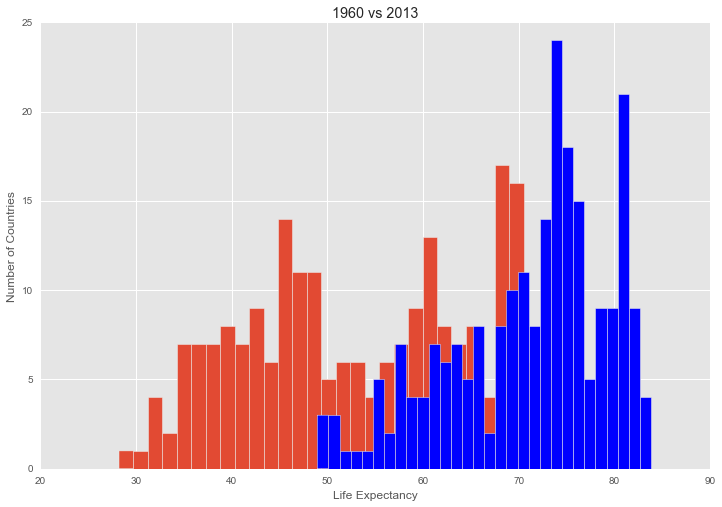

In [34]:
# compare two years in the same frame
f, (ax1) = plt.subplots(1,figsize=LARGE_FIGSIZE)
le.hist(column='1960',bins=30,ax=ax1);
le.hist(column='2013',bins=30,color='blue',ax=ax1);
plt.xlabel('Life Expectancy')
plt.ylabel("Number of Countries")
plt.title('1960 vs 2013')


In [42]:
# define function to compare two years in same frame
def compare_hist(year1,year2):
    f, (ax1) = plt.subplots(1,figsize=LARGE_FIGSIZE)
    le.hist(column=year1,bins=30,ax=ax1);
    le.hist(column=year2,bins=30,color='blue',ax=ax1);
    plt.xlabel('Life Expectancy')
    plt.ylabel("Number of Countries")
    plt.title(str(year1)+' vs '+str(year1))    

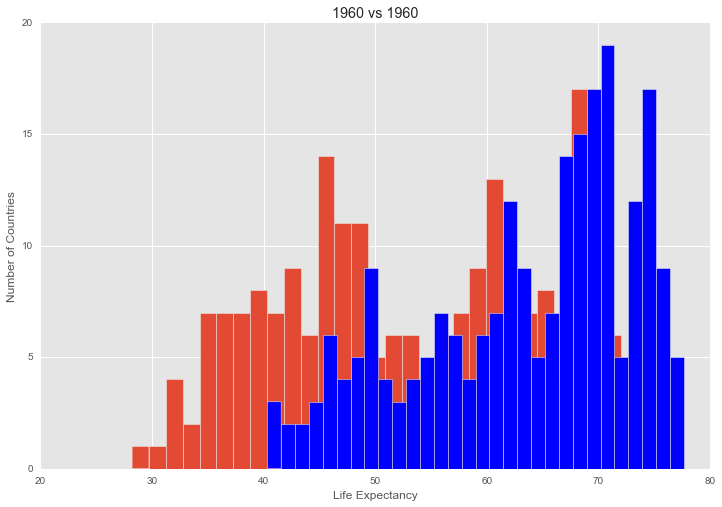

In [43]:
compare_hist('1960','1985')

#### Create interactive widget to compare decades

In [44]:
# use list comprehension to extract decades
years = [str(year) for year in range(1960,2014) if year%10==0]

In [45]:
years

['1960', '1970', '1980', '1990', '2000', '2010']

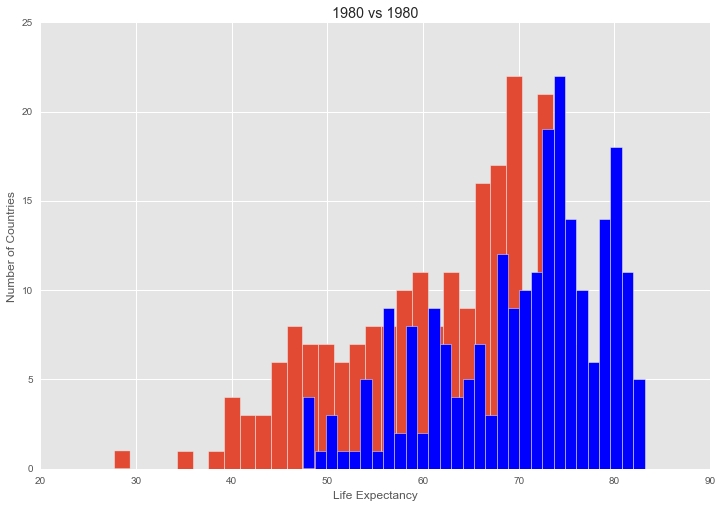

In [46]:
interact(compare_hist, year1=years,year2=years);